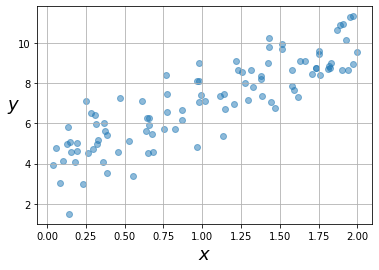

(100, 1) (100, 1)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

# mean center
# X -= np.average(X, axis=0)
# y -= np.average(y, axis=0)
# # putting in a ball of 1
# sx = np.max(abs(X),axis = 0)
# sy = np.max(abs(y))
# X /= sx
# y /= sy

plt.figure()
plt.scatter(X,y, alpha =0.5)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.show()

print (X.shape, y.shape)

In [2]:
'''
X    = Matrix of X with added bias units
y    = Vector of Y
theta=Vector of thetas np.random.randn(j,1)
learning_rate 
iterations = no of iterations

Returns the final theta vector and array of cost history over no of iterations
'''
    
def MSE(theta,X,y):    
    predictions = X.dot(theta)
    cost = (1/2*len(y)) * np.sum(np.square(predictions-y))
    return cost

def loss(theta,X,y):    
    predictions = X.dot(theta)
    loss = np.sum(np.square(predictions-y))
    return loss
    

def getGradient(X,y,theta):
    prediction = np.dot(X,theta)
    gradient = X.T.dot((prediction - y))
    return gradient
    
def getDirection(X,y,theta, sigma=0.4):
    out = np.zeros_like(theta)
    d = theta.shape[0]
    directions = np.random.normal(size = (8,d)) # random 8 direction
    
    fx = loss(theta,X,y)
    for di in directions:
        di = np.array([di]).T
        fxnew = loss(theta+ sigma*di,X,y)
        out += (1.0/8*sigma) * np.sum(fxnew-fx)*di
        
    return out # direction to move
    

def zeroOrder_descent(X,y,theta,learning_rate=0.01,iterations=100):
    
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        # getDirection will give direction without calculating gradient
        direction = getDirection(X,y,theta)
        theta = theta -(1/m)*learning_rate*(direction)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        
    return theta, cost_history, theta_history
        
    
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        gradient = getGradient(X,y,theta)
        theta = theta -(1/m)*learning_rate*(gradient)
        theta_history[it,:] =theta.T
        cost_history[it]  = MSE(theta,X,y)
        
    return theta, cost_history, theta_history


Theta:  [[3.11841336]
 [3.75199478]]
Final cost/MSE:  6843.402


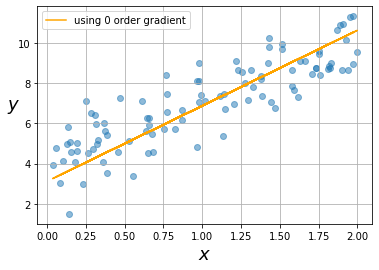

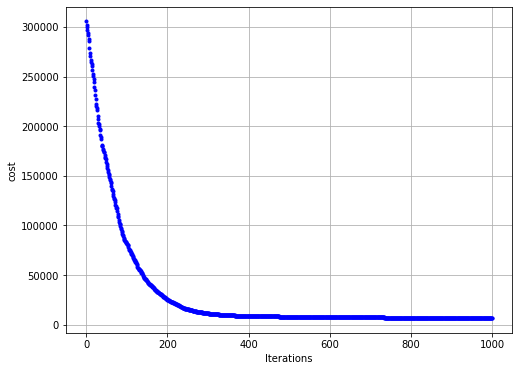

In [3]:
lr =0.01
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta0,cost_history0,theta_history0 = zeroOrder_descent(X_b,y,theta,lr,n_iter)
print('Theta: ', theta0)
print('Final cost/MSE:  {:0.3f}'.format(cost_history0[-1]))

#plot theta
plt.figure()
plt.scatter(X,y, alpha =0.5)
predy = np.dot(X_b,theta0)
plt.plot(X,predy, "orange", label= "using 0 order gradient")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()


fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history0,'b.')

Theta:  [[3.6065018 ]
 [3.33122847]]
Final cost/MSE:  5853.995


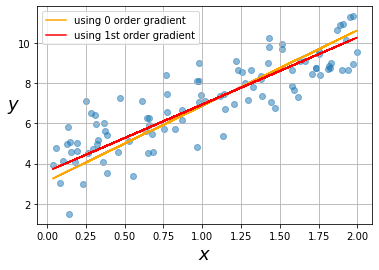

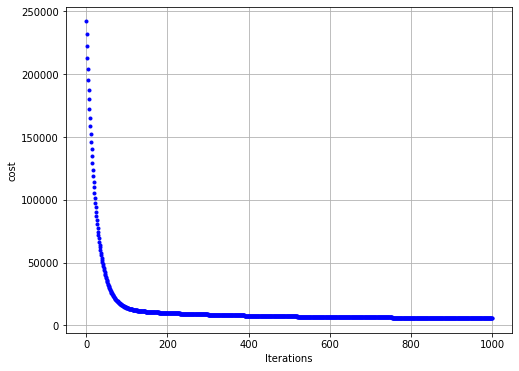

In [4]:
lr =0.01
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]

theta1,cost_history1,theta_history1 = gradient_descent(X_b,y,theta,lr,n_iter)

print('Theta: ', theta1)
print('Final cost/MSE:  {:0.3f}'.format(cost_history1[-1]))

#plot theta
# plt.figure()
plt.scatter(X,y, alpha =0.5)

# comment next 2 lines if not showing 0 order here
predy = np.dot(X_b,theta0)
plt.plot(X,predy, "orange", label= "using 0 order gradient")

predy = np.dot(X_b,theta1)
plt.plot(X,predy, "red", label= "using 1st order gradient")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.legend()
plt.show()

fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
ax.grid()
_=ax.plot(range(n_iter),cost_history1,'b.')